In [10]:
# pima-indians-diabetes
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [11]:
# This dataset gives information about us diabetes on Pima Indians.

# Outcome = 0; not diabetes. Outcome = 1; diabetes.

# Firstly, read dataset and save at "df" variable.

df = pd.read_csv('pima-indians-diabetes.csv')
print(df.head())

   6  148  72  35    0  33.6  0.627  50  1
0  1   85  66  29    0  26.6  0.351  31  0
1  8  183  64   0    0  23.3  0.672  32  1
2  1   89  66  23   94  28.1  0.167  21  0
3  0  137  40  35  168  43.1  2.288  33  1
4  5  116  74   0    0  25.6  0.201  30  0


In [12]:
#renaming column names for better understanding 
df.columns = ["pregnancies", "glucose", "blood_pressure", "skin_thickness","insulin","bmi","Diabetes_Pedigree_Function","age","outcome"]
df.head()

,pregnancies,glucose,blood_pressure,skin_thickness,insulin,bmi,Diabetes_Pedigree_Function,age,outcome
0,1,85,66,29,0,26.6,0.351,31,0
1,8,183,64,0,0,23.3,0.672,32,1
2,1,89,66,23,94,28.1,0.167,21,0
3,0,137,40,35,168,43.1,2.288,33,1
4,5,116,74,0,0,25.6,0.201,30,0


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 767 entries, 0 to 766
Data columns (total 9 columns):
pregnancies                   767 non-null int64
glucose                       767 non-null int64
blood_pressure                767 non-null int64
skin_thickness                767 non-null int64
insulin                       767 non-null int64
bmi                           767 non-null float64
Diabetes_Pedigree_Function    767 non-null float64
age                           767 non-null int64
outcome                       767 non-null int64
dtypes: float64(2), int64(7)
memory usage: 54.0 KB


In [14]:
# It seems that data has no any null entry. However missing value can be encoded in number of different ways.
#skin_thickness equal to zero, glucose equal to zero.Here zero,for all intent and purposes, is a missing value.

In [15]:
#dealing with missing data 
df.glucose.replace(0,np.nan,inplace = True)
df.insulin.replace(0,np.nan,inplace = True)
df.blood_pressure.replace(0,np.nan,inplace = True)
df.bmi.replace(0,np.nan,inplace = True)
df.skin_thickness.replace(0,np.nan,inplace = True)
df.age.replace(0,np.nan,inplace = True)
df.Diabetes_Pedigree_Function.replace(0,np.nan,inplace = True)

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 767 entries, 0 to 766
Data columns (total 9 columns):
pregnancies                   767 non-null int64
glucose                       762 non-null float64
blood_pressure                732 non-null float64
skin_thickness                540 non-null float64
insulin                       394 non-null float64
bmi                           756 non-null float64
Diabetes_Pedigree_Function    767 non-null float64
age                           767 non-null int64
outcome                       767 non-null int64
dtypes: float64(6), int64(3)
memory usage: 54.0 KB


In [17]:
df.head()

,pregnancies,glucose,blood_pressure,skin_thickness,insulin,bmi,Diabetes_Pedigree_Function,age,outcome
0,1,85.0,66.0,29.0,NaN,26.6,0.351,31,0
1,8,183.0,64.0,NaN,NaN,23.3,0.672,32,1
2,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
3,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1
4,5,116.0,74.0,NaN,NaN,25.6,0.201,30,0


In [18]:
#filling the NaN values with mean value, mainly targetting skin_thickness.
df = df.fillna(df.mean())
df.head()


,pregnancies,glucose,blood_pressure,skin_thickness,insulin,bmi,Diabetes_Pedigree_Function,age,outcome
0,1,85.0,66.0,29.000000,155.548223,26.6,0.351,31,0
1,8,183.0,64.0,29.142593,155.548223,23.3,0.672,32,1
2,1,89.0,66.0,23.000000,94.000000,28.1,0.167,21,0
3,0,137.0,40.0,35.000000,168.000000,43.1,2.288,33,1
4,5,116.0,74.0,29.142593,155.548223,25.6,0.201,30,0


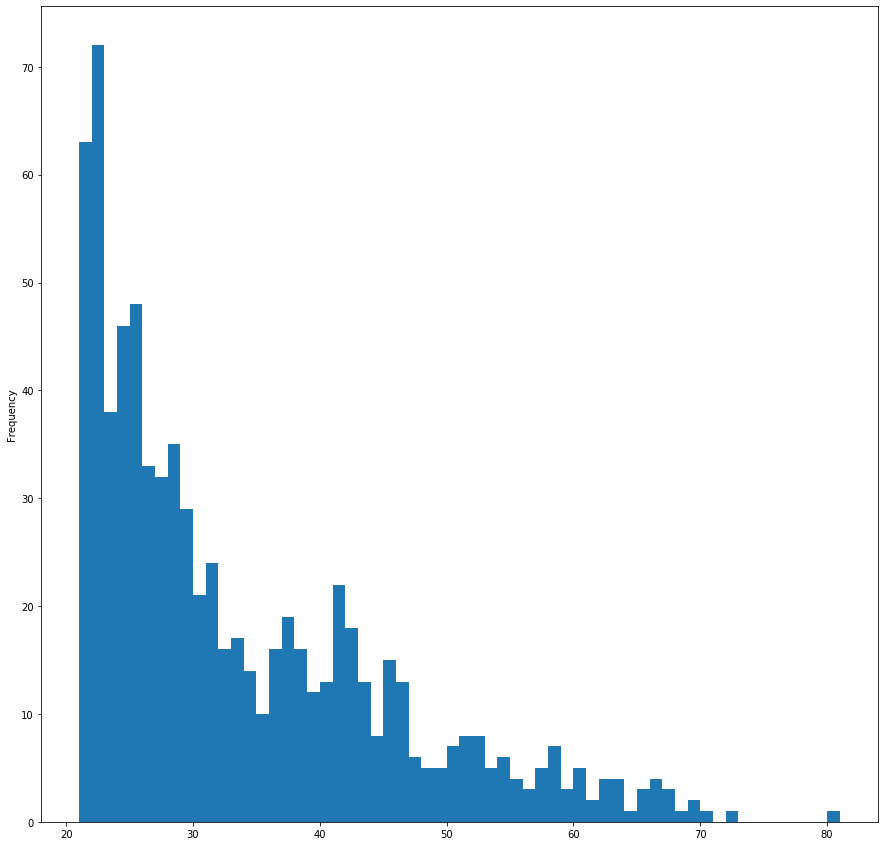

In [20]:
# Now, we will see the histogram of our data. Firstly, we will view histogram of Age.

df.age.plot(kind = 'hist',bins = 60,figsize = (15,15))
# bins = number of bar in figure
#x axis is Age. y axis is frequency of Age.
plt.show()

In [ ]:
# If we look at histogram; there is the maximum data in the dataset is in the 21-23 age group. The minimum data in the dataset is in the ~65-66,~68-69,~72-73 and~80-82 ages and there is any data under ~22 years old and ~74-80 years old.

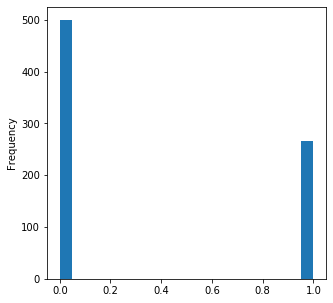

In [23]:
df.outcome.plot(kind = 'hist',bins = 20,figsize = (5,5))
# bins = number of bar in figure
#x axis is Age. y axis is frequency of Age.
plt.show()

In [ ]:
# We can see relevant of 2 features with scatter plot. For example; we can plot the relevant of glucose and insulin.

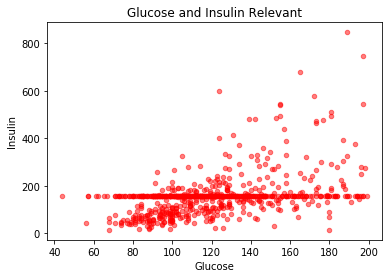

In [25]:
# x = pregnancy, y = outcome
df.plot(kind='scatter', x='glucose', y='insulin',alpha = 0.5,color = 'red')
#plt.scatter(data.Glucose,data.Insulin,alpha = 0.5,color = 'red') ## It is same as top row
plt.xlabel('Glucose')              
plt.ylabel('Insulin')
plt.title('Glucose and Insulin Relevant')            
plt.show()


In [ ]:
# Now we can analyse the outcome. In out dataset; 0 is not diabetes patient and 1 is diabetes patient. As we can see, in out dataset; have diabetes patient about 260 people and have not about 500 diabetes patient.

# There is the describe of out dataset is in below.

In [26]:
df.describe()

,pregnancies,glucose,blood_pressure,skin_thickness,insulin,bmi,Diabetes_Pedigree_Function,age,outcome
count,767.000000,767.000000,767.000000,767.000000,767.000000,767.000000,767.000000,767.000000,767.000000
mean,3.842243,121.652231,72.405738,29.142593,155.548223,32.455952,0.471674,33.219035,0.348110
std,3.370877,30.440947,12.104231,8.794137,85.076586,6.879514,0.331497,11.752296,0.476682
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.500000,64.000000,25.000000,121.000000,27.500000,0.243500,24.000000,0.000000
50%,3.000000,117.000000,72.405738,29.142593,155.548223,32.400000,0.371000,29.000000,0.000000
75%,6.000000,140.000000,80.000000,32.000000,155.548223,36.600000,0.625000,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [ ]:
# Let's analyse the describe results.

# The minimum age is 21 and maximum age is 81. We saw this in histogram chart. The mean of our dataset is ~33.

# In our dataset there is the maximum number of pregnancy is 17 and minimum number of pregnancy is 0. The mean of pregnancy is ~4.

# The maximum glucose level is 199 and mean glucose level is ~120.

# The maximum blood pressure level is 122, minimum blood pressure level is ~19 and mean blood pressure level is ~69.